In [ ]:
import re
import numpy as np
import datetime

dag_file = './aldd_dag_hs_0.dag'
rnd_job_name_fmt='RND_{}_{}_{}'
dist_job_name_fmt='DIST_{}_{}_{}'
exploration_strategy = ['weighted', 'random', 'dissimilar']
rnd_flag = '--random_param_sampling'
dist_flag = '--no-random_param_sampling'


with open(dag_file) as f:
    dag_log = f.readlines()
dag_log = [x.strip() for x in dag_log] 

new_dag_log = []
for f in failed_jobs:
    dist_type = f.split('_')[0]
    process_num = int(f.split('_')[-1])
    
    job_name = 'RND_{}'.format(process_num)
    if dist_type == 'distributive':
        job_name = 'DIST_{}'.format(process_num)
    new_dag_log.extend([x for x in dag_log if job_name in x])
new_dag_log.extend(dag_log[-2:])

with open('aldd_dag_f1.dag', 'w') as f:
    for item in new_dag_log:
        f.write("%s\n" % item)

In [ ]:
import pandas as pd
import glob
import numpy as np

df = pd.concat([pd.read_csv(f) for f in glob.glob('../params_results/distributive/weighted/ClusterBasedWCSelector_488/batch_size_96/iter_*/exploration.csv')])

---
# Check for duplicate selected cpds

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
from IPython.display import clear_output

explore_files = glob.glob('../../../aldd_results/params_results/*/*/*/*/iter_*/exploration.csv')
exploit_files = glob.glob('../../../aldd_results/params_results/*/*/*/*/iter_*/exploitation.csv')

In [ ]:
for i, e_file in enumerate(explore_files):
    clear_output()
    print('{}/{}'.format(i, len(explore_files)))
    sel_df = pd.read_csv(e_file)
    assert sel_df.shape[0] == sel_df['Index ID'].unique().shape[0]

In [ ]:
for i, e_file in enumerate(exploit_files):
    clear_output()
    print('{}/{}'.format(i, len(exploit_files)))
    sel_df = pd.read_csv(e_file)
    assert sel_df.shape[0] == sel_df['Index ID'].unique().shape[0]

In [ ]:
res_df_list = [[], [], []]
failed_jobs = []
all_jobs = []
for i, s_file in enumerate(summary_files):
    clear_output()
    print('{}/{}'.format(i, len(summary_files)))
    s_params = s_file.split('\\')
    config_file = s_file.replace('summary.csv', 'config.csv')
    dist_type = s_params[1]
    exploration_strategy = s_params[2]
    hs_name = s_params[3]
    batch_size = s_params[4]
    
    hs_info = [dist_type, exploration_strategy, hs_name, batch_size, config_file]
    hs_id = '{}_{}_{}_{}'.format(dist_type, exploration_strategy, hs_name, batch_size)
    
    all_jobs.append(hs_id)
    
    if pd.read_csv(config_file)['']
    
    df = pd.read_csv(s_file, index_col=0)
    bsize_df = df[['exploitation_batch_size', 'exploration_batch_size']]
    exploit_df = df[[m for m in df.columns if 'exploitation_hits_at_' in m]].sum(axis=1).to_frame(name='exploitation_hits')
    explore_df = df[[m for m in df.columns if 'exploration_hits_at_' in m]].sum(axis=1).to_frame(name='exploration_hits')
    exploit_max_df = df[[m for m in df.columns if 'exploitation_max_hits_at_' in m]].sum(axis=1).to_frame(name='exploitation_max_hits')
    explore_max_df = df[[m for m in df.columns if 'exploration_max_hits_at_' in m]].sum(axis=1).to_frame(name='exploration_max_hits')
    
    sum_df = pd.concat([bsize_df, exploit_df, exploit_max_df, explore_df, explore_max_df], axis=1)
    sum_df['total_batch_size'] = sum_df['exploitation_batch_size'] + sum_df['exploration_batch_size']
    sum_df['total_hits'] = sum_df['exploitation_hits'] + sum_df['exploration_hits']
    sum_df['total_max_hits'] = sum_df['exploitation_max_hits'] + sum_df['exploration_max_hits']
    sum_df['total_max_hits'] = sum_df['total_max_hits'].apply((lambda x: min(x, int(batch_size.split('_')[-1]))))
    
    sum_df.iloc[-1,:] = sum_df.iloc[:-1,:].sum(axis=0)
    sum_df['iteration'] = list(range(10)) + [9999]
    sum_df['hyperparameter_id'] = hs_id
    sum_df.index = list(range(10)) + ['total']
    
    sum_df['config_file'] = config_file
    
    if batch_size == 'batch_size_96':
        res_df_list[0].append(sum_df)
    elif batch_size == 'batch_size_384':
        res_df_list[1].append(sum_df)
    else:
        res_df_list[2].append(sum_df)

all_0 = pd.concat(res_df_list[0])
all_1 = pd.concat(res_df_list[1])
all_2 = pd.concat(res_df_list[2])
all_0['hits_to_batch_size_ratio'] = all_0['total_hits'] / all_0['total_batch_size']
all_1['hits_to_batch_size_ratio'] = all_1['total_hits'] / all_1['total_batch_size']
all_2['hits_to_batch_size_ratio'] = all_2['total_hits'] / all_2['total_batch_size']
all_df = pd.concat([all_0, all_1, all_2])

In [ ]:
import pandas as pd
import numpy as np
import glob

a = glob.glob('../params_results/benchmark/InstanceBasedDissimilar/3605/batch_size_96/training_data/*.csv')
df = pd.concat([pd.read_csv(x) for x in a])
df['Index ID'].unique().shape[0] == (11*96), df['pcba-aid624173'].sum()

---
# generic debugging

In [71]:
import pandas as pd
import numpy as np
import glob

tmp = './tmp/*.out'
files = glob.glob(tmp)
strats = [x.split('\\')[1].split('HS_')[1].split('_TASK')[0] for x in files]
strats = list(np.unique(strats))

res = []
for f in files:
    with open(f) as ff:
        content = ff.readlines()
    t = [x for x in content if 'Finished processing iteration ' in x][-1]
    hrs = float(t.split()[-2]) / 3600
    
    strat_name = f.split('\\')[1].split('HS_')[1].split('_TASK')[0]
    res.append([strat_name, hrs])
    
df = pd.DataFrame(res, columns=['strat', 't'])

In [101]:
a = df.groupby('strat').describe()['t']['max'] 
a*4

strat
ClusterBasedRandom                  1.705850
ClusterBasedWCSelector_341          2.396667
ClusterBasedWCSelector_55          11.863865
ClusterBasedWCSelector_609         19.173619
ClusterBasedWCSelector_custom_1    16.977434
InstanceBasedRandom                20.188725
MABSelector_2                       1.100803
MABSelector_exploitive              1.166374
Name: max, dtype: float64

In [ ]:
if hp_num in ['MABSelector_2', 'MABSelector_exploitive']:
    iters_per_job_run = 25 # 2 jobs
if hp_num in ['ClusterBasedRandom', 'ClusterBasedWCSelector_341']:
    iters_per_job_run = 10 # 5 jobs
else
    iters_per_job_run = 4 # 12 jobs

In [ ]:
# if not taking into account OSG nodes need to run in less than 8 hours
if hp_num in ['MABSelector_2', 'MABSelector_exploitive', 'ClusterBasedRandom', 'ClusterBasedWCSelector_341']: 
    iters_per_job_run = 50 # 1 job
elif hp_num in ['ClusterBasedWCSelector_55']:
    iters_per_job_run = 15 # 4 jobs 
else
    iters_per_job_run = 10 # 5 jobs

In [115]:
4 * 107 * 10

4280

In [28]:
import glob
import pandas as pd
import numpy as np

dir_list = ['custom_cbws\\ClusterBasedWCSelector_custom_1\\pcba-aid588579\\4',
            'sampled_hyparams\\ClusterBasedWCSelector_341\\pcba-aid1471\\7',
            'sampled_hyparams\\ClusterBasedWCSelector_341\\pcba-aid1471\\7']
dir1 = '../params_results/params_results/{}/batch_size_96/training_data/iter_{}.csv'
dir2 = '../../../aldd_results/params_results_exp3_May_25_2020/params_results/{}/batch_size_96/training_data/iter_{}.csv'

for x in dir_list:
    tmp1 = [dir1.format(x, i) for i in range(4)]
    tmp2 = [dir2.format(x, i) for i in range(4)]
    
    df1 = pd.concat([pd.read_csv(a) for a in tmp1])
    df2 = pd.concat([pd.read_csv(a) for a in tmp2])
    
    assert df1.equals(df2)

In [27]:
tmp1

['../params_results/params_results/sampled_hyparams\\ClusterBasedWCSelector_341\\pcba-aid1471\\7/batch_size_96/training_data/iter_0.csv',
 '../params_results/params_results/sampled_hyparams\\ClusterBasedWCSelector_341\\pcba-aid1471\\7/batch_size_96/training_data/iter_1.csv',
 '../params_results/params_results/sampled_hyparams\\ClusterBasedWCSelector_341\\pcba-aid1471\\7/batch_size_96/training_data/iter_2.csv',
 '../params_results/params_results/sampled_hyparams\\ClusterBasedWCSelector_341\\pcba-aid1471\\7/batch_size_96/training_data/iter_3.csv']

In [18]:
df2

,Index ID,Molecule,rdkit SMILES,Morgan FP_2_1024,BT_0.4 ID,BT_0.4 Leader Index,pcba-aid588579
0,378793,_PCBA-2166341,CCCNC(=O)c1ccc(COc2ccc(C(C)(C)C)cc2)o1,0000001010000000000000000000000001000010000000...,9346,111010,0.0
1,387640,_PCBA-3146329,O=C(c1ccco1)N1N=C(c2cccs2)CC1c1ccco1,0000000000000010000000000000000000000000001000...,4627,69698,0.0
2,416074,_PCBA-227278,CCC(C(=O)c1ccc(O)cc1)c1ccccc1,0100000000000000000000000000000001000000000000...,471637,416074,0.0
3,119812,_PCBA-16014977,COc1ccccc1NC(=O)CSc1nc(=O)c(C#N)c(-c2ccc(C(C)(...,0000000000000000000000000000000001000000010000...,2952,24014,0.0
4,422421,_PCBA-16329929,COc1cccc(-n2cnnc2SC(C)C(=O)NC2CCCC2)c1,0100100000000011000000000100000001000000000000...,7674,329823,0.0
5,241101,_PCBA-2939456,CCOC(=O)C(Sc1nnc2c3ccccc3n(CC)c2n1)C(=O)OCC,0100000000000000000000000000000001100000000001...,1676,391008,0.0
6,127803,_PCBA-5763789,CC1=C(C)CC(C(=O)N2CCN(CC=Cc3ccccc3)CC2)C(C(=O)...,0000000000000000000000000000000001000000000000...,32101,38229,0.0
7,411066,_PCBA-44144125,COC(=O)C1=C(c2ccccc2OCc2ccccc2)CC2CCC1N2C(=O)N...,0000000000001001000000000000000001000000001000...,28,148344,0.0
8,81588,_PCBA-4884328,CCN(CC)S(=O)(=O)c1ccc2c(c1)nc(SCC(N)=O)n2-c1cc...,0000000000000000000000000000000001010000000001...,27871,170451,0.0
9,149800,_PCBA-4786695,CC(=O)NC(CC(=O)OCC(=O)c1ccc(NC(=O)CC(C)C)cc1)c...,0100000000000000000000000000000001000000010000...,205363,149800,0.0


In [18]:
x = """     3  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:20 ./HS_ClusterBasedRandom_TASK_pcba-aid485281_BATCH_0_START_0_ITERS_0_out.tar.gz
     4  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:43 ./HS_ClusterBasedRandom_TASK_pcba-aid624288_BATCH_0_START_8_ITERS_0_out.tar.gz
     5  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:29 ./HS_ClusterBasedRandom_TASK_pcba-aid924_BATCH_0_START_allinactive0_ITERS_0_out.tar.gz
     6  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:20 ./HS_ClusterBasedWCSelector_55_TASK_pcba-aid540276_BATCH_0_START_5_ITERS_0_out.tar.gz
     7  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:19 ./HS_ClusterBasedWCSelector_55_TASK_pcba-aid602310_BATCH_0_START_3_ITERS_0_out.tar.gz
     8  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:21 ./HS_ClusterBasedWCSelector_609_TASK_pcba-aid504332_BATCH_0_START_1_ITERS_0_out.tar.gz
     9  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:33 ./HS_ClusterBasedWCSelector_609_TASK_pcba-aid602179_BATCH_0_START_4_ITERS_0_out.tar.gz
    10  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:34 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid1468_BATCH_0_START_3_ITERS_0_out.tar.gz
    11  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:34 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid2101_BATCH_0_START_5_ITERS_0_out.tar.gz
    12  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:30 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid485294_BATCH_0_START_1_ITERS_0_out.tar.gz
    13  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:30 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid485364_BATCH_0_START_2_ITERS_0_out.tar.gz
    14  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:31 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid485367_BATCH_0_START_1_ITERS_0_out.tar.gz
    15  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:31 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid492947_BATCH_0_START_5_ITERS_0_out.tar.gz
    16  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:21 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid504891_BATCH_0_START_2_ITERS_0_out.tar.gz
    17  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:46 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid504891_BATCH_0_START_5_ITERS_0_out.tar.gz
    18  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:33 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid651635_BATCH_0_START_5_ITERS_0_out.tar.gz
    19  -rw------- 1 alnammi alnammi     0 Jun 28 06:21 ./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid720709_BATCH_0_START_2_ITERS_4_out.tar.gz
    20  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:01 ./HS_MABSelector_2_TASK_pcba-aid1379_BATCH_0_START_6_ITERS_0_out.tar.gz
    21  -rw-r--r-- 1 alnammi alnammi     0 Jun 28 08:14 ./HS_MABSelector_2_TASK_pcba-aid602332_BATCH_0_START_6_ITERS_0_out.tar.gz"""

for a in x.split('\n'):
    strat = a.split('_TASK')[0].split('HS_')[-1]
    task = a.split('TASK_')[-1].split('_BATCH')[0]
    start = a.split('START_')[-1].split('_ITERS')[0]
    sclass = ['benchmarks', 'sampled_hyparams', 'custom_cbws']
    
    if strat in ['ClusterBasedWCSelector_55', 'ClusterBasedWCSelector_609']:
        sclass = 'sampled_hyparams'
    elif strat == ['MABSelector_2', 'ClusterBasedRandom']:
        sclass = 'benchmarks'
    else:
        sclass = 'custom_cbws'
        
    job = 'HS_{}_TASK_{}_BATCH_0_START_{}_ITERS_0_out.tar.gz'.format(strat, task, start)
    line1 = 'mkdir -p ./params_results/{}/{}/{}/{}/ > /dev/null'.format(sclass, strat, task, start)
    line2 = 'tar -czvf {} ./params_results/{}/{}/{}/{}/ > /dev/null'.format(job, sclass, strat, task, start)
    
    print(line1)
    print(line2)

mkdir -p ./params_results/custom_cbws/ClusterBasedRandom/pcba-aid485281/0/ > /dev/null
tar -czvf HS_ClusterBasedRandom_TASK_pcba-aid485281_BATCH_0_START_0_ITERS_0_out.tar.gz ./params_results/custom_cbws/ClusterBasedRandom/pcba-aid485281/0/ > /dev/null
mkdir -p ./params_results/custom_cbws/ClusterBasedRandom/pcba-aid624288/8/ > /dev/null
tar -czvf HS_ClusterBasedRandom_TASK_pcba-aid624288_BATCH_0_START_8_ITERS_0_out.tar.gz ./params_results/custom_cbws/ClusterBasedRandom/pcba-aid624288/8/ > /dev/null
mkdir -p ./params_results/custom_cbws/ClusterBasedRandom/pcba-aid924/allinactive0/ > /dev/null
tar -czvf HS_ClusterBasedRandom_TASK_pcba-aid924_BATCH_0_START_allinactive0_ITERS_0_out.tar.gz ./params_results/custom_cbws/ClusterBasedRandom/pcba-aid924/allinactive0/ > /dev/null
mkdir -p ./params_results/sampled_hyparams/ClusterBasedWCSelector_55/pcba-aid540276/5/ > /dev/null
tar -czvf HS_ClusterBasedWCSelector_55_TASK_pcba-aid540276_BATCH_0_START_5_ITERS_0_out.tar.gz ./params_results/sampled_hy

In [1]:
broken_jobs = "./HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid720709_BATCH_0_START_2_ITERS_4_out.tar.gz"

In [4]:
"HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid720709_BATCH_0_START_2" == "HS_ClusterBasedWCSelector_custom_1_TASK_pcba-aid720709_BATCH_0_START_2"

True

---
# Look at Exploration heavy ClusterBasedWSelector Models

In [4]:
import json

f609='../param_configs/experiment_3_hyperparams/sampled_hyparams/ClusterBasedWCSelector_609.json'
f55='../param_configs/experiment_3_hyperparams/sampled_hyparams/ClusterBasedWCSelector_55.json'

with open(f609) as f:
    config1 = json.load(f)
with open(f55) as f:
    config2 = json.load(f)

{'class': 'ClusterBasedWCSelector',
 'batch_size': [96, 384, 1536],
 'exploitation_use_quantile_for_activity': False,
 'exploitation_sample_actives_from_clusters': True,
 'exploitation_activity_threshold': 0.5,
 'exploitation_use_quantile_for_weight': False,
 'exploitation_weight_threshold': 1.0,
 'exploitation_alpha': 0.75,
 'exploitation_dissimilarity_lambda': 1.0,
 'use_intra_cluster_threshold_for_exploitation': True,
 'use_proportional_cluster_budget_for_exploitation': False,
 'exploration_strategy': 'weighted',
 'exploration_use_quantile_for_weight': True,
 'exploration_weight_threshold': 0.5,
 'exploration_beta': 1.0,
 'exploration_dissimilarity_lambda': 0.25,
 'use_intra_cluster_threshold_for_exploration': False,
 'use_proportional_cluster_budget_for_exploration': True,
 'select_dissimilar_instances_within_cluster': False,
 'intra_cluster_dissimilarity_threshold': 0.05,
 'feature_dist_func': 'tanimoto_dissimilarity',
 'use_consensus_distance': True,
 'uncertainty_method': 'least

In [7]:
for k in config1:
    if config1[k] != config2[k]:
        print('{}: {} , {}.'.format(k, config1[k], config2[k]))

exploitation_sample_actives_from_clusters: True , False.
exploitation_activity_threshold: 0.5 , 1.0.
exploitation_use_quantile_for_weight: False , True.
exploration_use_quantile_for_weight: True , False.
exploration_weight_threshold: 0.5 , 0.25.
exploration_beta: 1.0 , 0.75.
use_intra_cluster_threshold_for_exploration: False , True.
use_proportional_cluster_budget_for_exploration: True , False.
intra_cluster_dissimilarity_threshold: 0.05 , 0.0.
rnd_seed: 174669263 , 7601279.
hyperparameter_id: ClusterBasedWCSelector_609 , ClusterBasedWCSelector_55.
hyperparameter_group_promotion: top_1536 , top_384.


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

preds = np.linspace(0, 1, 1000)
uncertainty = 1 - (np.abs(2*preds - 1))

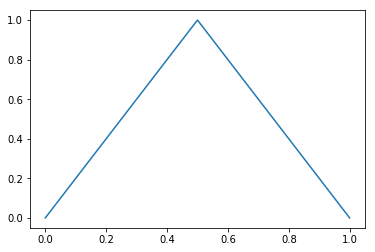

In [11]:
plt.plot(preds, uncertainty)

In [52]:
from active_learning_dd.models.supervised  import *

Using TensorFlow backend.


In [56]:
model = sklearn_randomforest.SklearnRF(['a'])

In [84]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
y[y >= 2] = 1
y = y.reshape(-1,1)

model.fit(X, y)
preds = model.predict(X)
model.get_uncertainty(X, 'least_confidence', []), 1 - (np.abs(2*preds - 1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


(array([[0.  ],
        [0.1 ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.18],
        [0.06],
        [0.  ],
        [0.  ],
        [0.02],
        [0.  ],
        [0.26],
        [0.08],
        [0.  ],
        [0.  ],
        [0.2 ],
        [0.02],
        [0.02],
        [0.  ],
        [0.  ],
        [0.12],
        [0.  ],
        [0.18],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.02],
        [0.  ],
        [0.02],
        [0.06],
        [0.04],
        [0.14],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.38],
        [0.  ],
        [0.  ],
        [0.02],
        [0.02],
        [0.02],
        [0.  ],
        [0.  ],
        [0.06],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.02],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.14],
        [0.  ],
        [0.1 ],
        [0.12],
        [0.  ],
        

In [83]:
model.predict(X)[np.argsort(model.predict(X)[:,0]),0]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.04, 0.04, 0.04,
       0.05, 0.06, 0.1 , 0.14, 0.15, 0.23, 0.76, 0.9 , 0.91, 0.94, 0.94,
       0.95, 0.95, 0.97, 0.97, 0.97, 0.97, 0.98, 0.98, 0.99, 0.99, 0.99,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [16]:
import re
import numpy as np
import datetime

dag_file = './file_609.spl'

with open(dag_file) as f:
    content = f.readlines()
    
new_content = [x for x in content if 'ClusterBasedWCSelector_609' in x]

In [18]:
with open(dag_file, 'w') as f:
    f.writelines(new_content)

In [19]:
content[-4:]

['SCRIPT POST HS_ClusterBasedWCSelector_609_TASK_pcba-aid602332_BATCH_0_START_0_ITERS_4 ./post_job_success_script.sh HS_ClusterBasedWCSelector_609_TASK_pcba-aid602332_BATCH_0_START_0_ITERS_4 HS_ClusterBasedWCSelector_609_TASK_pcba-aid602332_BATCH_0_START_0_ITERS_3 jobs_log.log\n',
 'PRIORITY HS_ClusterBasedWCSelector_609_TASK_pcba-aid602332_BATCH_0_START_0_ITERS_4 6\n',
 'RETRY ALL_NODES 5\n',
 'CONFIG my.dag.config\n']

In [3]:
import pandas as pd 

x = pd.read_csv('../../ALDD-PstP-Results/results/setting_true/next_batch/iter_1.csv.gz')
x[x['Molecule'].str.contains('ATA')]

,Index ID,Molecule,PubChem_CID,SMILES,rdkit SMILES,Morgan FP_2_1024,BT_0.2 ID,BT_0.2 ID Leader,BT_0.3 ID,BT_0.3 ID Leader,BT_0.4 ID,BT_0.4 ID Leader,PstP Adaptive Active,PstP True Active,PstP Inhibition
